<a href="https://colab.research.google.com/github/loicdaloz/etfdata/blob/main/001_DCA_vs_LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dollar Cost Averagering (DCA) versus Lump Sum (LS)**

When given a set amount of money to invest, no matter the amount, the first question that comes in mind is when to allocate the money, the question asked is "Should I invest all the money now or over a period of time?"
Dollar Cost Averagering strategy (DCA) is an investment strategy that came to light thanks to Benjamin Graham and his book "The Intelligent Investor" published in 1949 and has the main objective to lower the total average cost per share of an investment.
On the opposite the Lump Sum strategy is the act of investing all the available money at once.
Here is the visual representation of investing $120,000 according to both stategy:

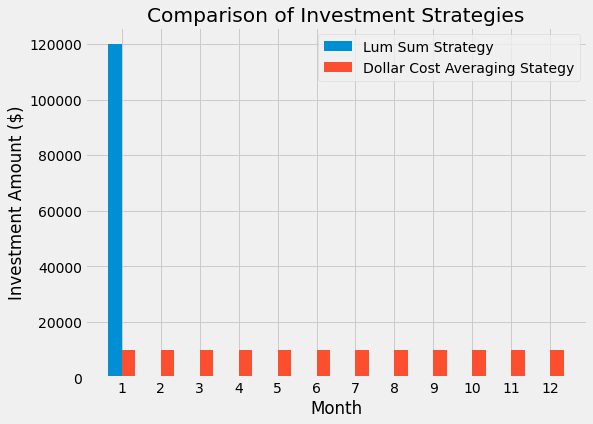

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Define the investment amounts for each strategy
strategy1 = [120000] + [0] * 11
strategy2 = [10000] * 12

# Create the bar chart
x = np.arange(1, 13)
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, strategy1, width, label='Lum Sum Strategy')
rects2 = ax.bar(x + width/2, strategy2, width, label='Dollar Cost Averaging Stategy')
ax.set_xlabel('Month')
ax.set_ylabel('Investment Amount ($)')
ax.set_title('Comparison of Investment Strategies')
ax.set_xticks(x)
ax.legend()
plt.show()



With the Lump Sum (LS) stategy you will invest the 120,000 during the first month in a single investment of the same amount, while using the Dollar Cost Averaging (DCA) Stategy only $10,000 will be invested during the first month and it will be followed by 11 other equal sized payments over the next month for a DCA stategy of 1 year.

The main advantage described by DCA enthusiasts is the reduction of the risk by extending the period of investment which make the investment value less prone to high market fluctuaction on the downside (crashes)


---


The objective of this data analysis is to compare both investement stategies with historical data

I will be using the SPY ticker as it gives a good representation of the US market in its composition


---


Limitation of the analysis: To simplify the analysis we are considering that the remaning cash that is not invested for the DCA stategy remain in cash, meaning that the return of the remaning cash is 0% whil it can be theorically invested in risk free assets

In [52]:
#Import Libraries used for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load SPY Data
#SPY data is sources from Yahoo Finance and only Adjusted close will be used for the analysis
from google.colab import files
files.upload()

In [60]:
#Read SPY data
asset = pd.read_csv('SPY (2).csv')
#Set date as index
asset = asset.set_index(pd.DatetimeIndex(asset['Date'].values))
#Show data
asset

,Date,Open,High,Low,Close,Adj Close,Volume
1993-01-29,1993-01-29,43.968750,43.968750,43.750000,43.937500,25.122353,1003200
1993-02-01,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.301016,480500
1993-02-02,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.354616,201300
1993-02-03,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.622656,529400
1993-02-04,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.729858,531500
...,...,...,...,...,...,...,...
2023-03-15,2023-03-15,385.890015,389.489990,383.709991,389.279999,387.799957,172996900
2023-03-16,2023-03-16,386.820007,396.470001,386.290009,396.109985,394.603973,143254200
2023-03-17,2023-03-17,393.220001,394.399994,388.549988,389.989990,389.989990,140047400
2023-03-20,2023-03-20,390.799988,394.170013,390.070007,393.739990,393.739990,93055800


Text(0, 0.5, 'Adj. Close Price (USD)')

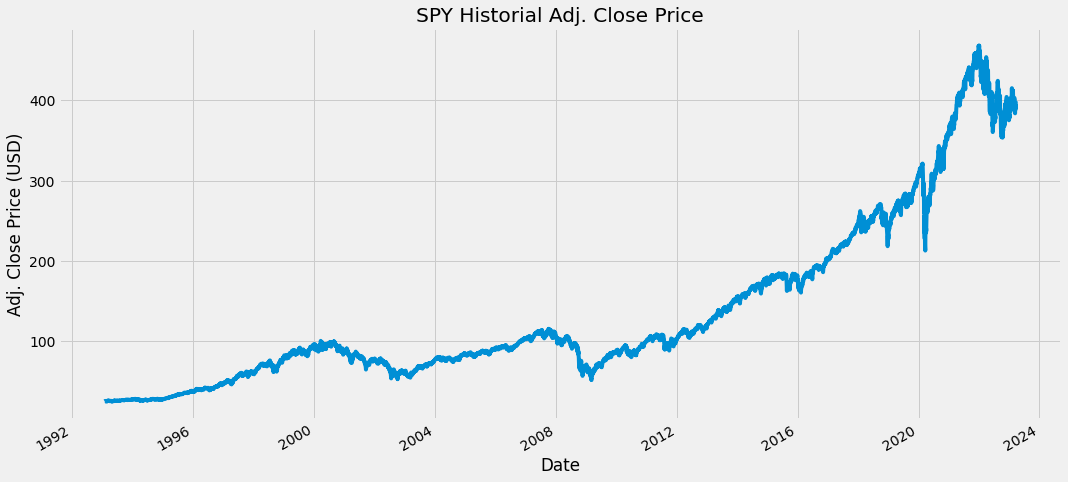

In [79]:
#Show the data visually to reflect SPY Adj close price
asset['Adj Close'].plot(figsize = (16,8))
plt.title('SPY Historial Adj. Close Price')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price (USD)')

In [83]:
#Calculate and Show LS investment strategy
#Get adj close prices from dataset
adj_close_price = asset['Adj Close']
#Choose initial investment amount
initial_investment = 12000
#Get last price valie of the SPDR within data set
stock_latest_value = adj_close_price[-1]
#Get number of share bought on each date with hypothetical investment amount aka LS
num_shares_bought = initial_investment / adj_close_price
#Calculate how much money you would have according to the last price in this dataset for investing a LS on a given date in the past
lump_sum = stock_latest_value * num_shares_bought
#Show data
lump_sum

1993-01-29    190544.255468
1993-02-01    189198.728146
1993-02-02    188798.759484
1993-02-03    186823.725378
1993-02-04    186045.334879
                  ...      
2023-03-15     12343.786949
2023-03-16     12130.947420
2023-03-17     12274.469014
2023-03-20     12157.566337
2023-03-21     12000.000000
Name: Adj Close, Length: 7590, dtype: float64

In [85]:
#Compute and show best and worst day for LS
print('Lump Sum Investments:')
print('Best day to invest a $'+str(initial_investment)+ ' LS was on '+lump_sum.idxmax().strftime('%b %d %Y')+ ' and would be worth $'+str(round(lump_sum.max(), 2))+ ' on '+lump_sum.last_valid_index().strftime('%b %d %Y'))
print('Worst day to invest a $'+str(initial_investment)+ ' LS was on '+lump_sum.idxmin().strftime('%b %d %Y')+ ' and would be worth $'+str(round(lump_sum.min(), 2))+ ' on '+lump_sum.last_valid_index().strftime('%b %d %Y'))

Lump Sum Investments:
Best day to invest a $12000 LS was on Feb 18 1993 and would be worth $192876.41 on Mar 21 2023
Worst day to invest a $12000 LS was on Jan 03 2022 and would be worth $10221.99 on Mar 21 2023


Text(0, 0.5, 'Investment Value in USD')

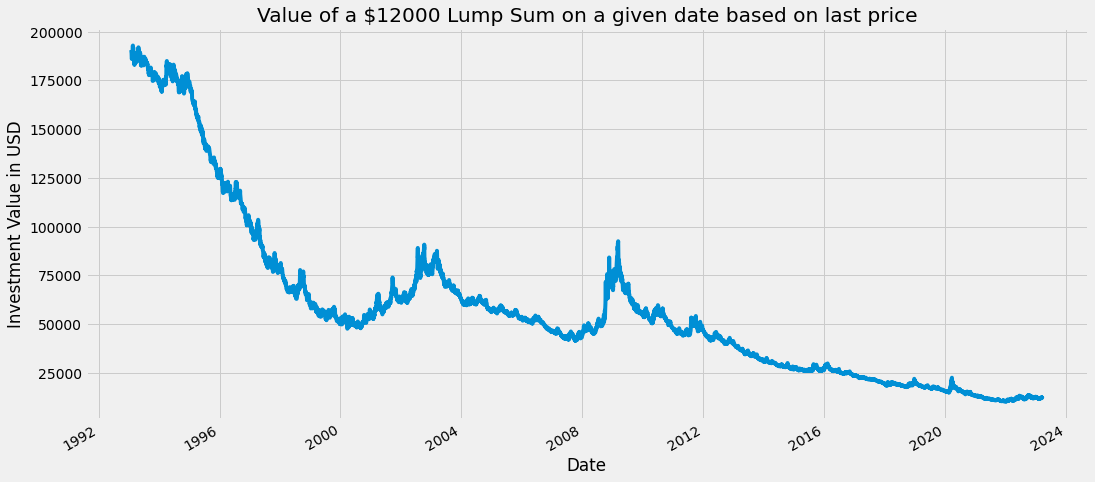

In [89]:
#Plot LS Data
lump_sum.plot(figsize=(16,8))
plt.title('Value of a $'+str(initial_investment)+' Lump Sum on a given date based on last price')
plt.xlabel('Date')
plt.ylabel('Investment Value in USD')

In [90]:
#Create a function to calculate the DCA Stategy
def DCA(start_date, initial_investment):
    #Get the investement periods which will be 12 months
    investment_date_periods = 12.0

    #Calculate the portion or amount invested for each period
    investment_portion = initial_investment / investment_date_periods

    #Get dates of the investemnt periods
    all_investment_dates = pd.date_range(start_date, periods = investment_date_periods, freq = '30D')

    #Get the dates up to the last date in our dataset
    investment_dates = all_investment_dates[all_investment_dates < asset.index[-1]]

    #Get the indicices (and in turn the dates) within the dataset that arre the closest to the investment date as stock market is onot open everyday
    closest_investment_dates = asset.index.searchsorted(investment_dates)

    #Get list of stock prices at the closest investment date
    stock_prices = asset['Adj Close'][closest_investment_dates]

    #Get total number of shares invested in by summing all the share purchases on each on the investement dates
    total_shares_invested = sum(investment_portion / stock_prices)

    #Get the cash that was not invested from the initial investement amount
    uninvested_cash = investment_portion * sum(all_investment_dates >= asset.index[-1])

    #calculate total
    total = uninvested_cash + asset['Adj Close'][-1] * total_shares_invested
    return total

In [91]:
#Execute DCA function
DCA_List = []
for date in asset.index:
    DCA_List.append( DCA(date, initial_investment))

In [92]:
#Convert list into series
#Create new dataframe
dca = pd.DataFrame()
dca['DCA'] = DCA_List
#Set date as index
dca = dca.set_index(pd.DatetimeIndex(asset.index))
#Convert datafrae to series
dca = dca.squeeze()
#Show data
dca

1993-01-29    182271.886976
1993-02-01    182141.163699
1993-02-02    182193.726242
1993-02-03    182230.605077
1993-02-04    181911.248652
                  ...      
2023-03-15     12028.648912
2023-03-16     12010.912285
2023-03-17     12022.872418
2023-03-20     12013.130528
2023-03-21     12000.000000
Name: DCA, Length: 7590, dtype: float64

In [94]:
#Compute and show best and worst day initiating DCA
print('DCA Investments:')
print('Best day to start DCA a $'+str(initial_investment)+ ' investment was on '+dca.idxmax().strftime('%b %d %Y')+ ' and would be worth $'+str(round(dca.max(), 2))+ ' on'+dca.last_valid_index().strftime('%b %d %Y'))
print('worst day to start DCA a $'+str(initial_investment)+ ' investment was on '+dca.idxmin().strftime('%b %d %Y')+ ' and would be worth $'+str(round(dca.min(), 2))+ ' on'+dca.last_valid_index().strftime('%b %d %Y'))

DCA Investments:
Best day to start DCA a $12000 investment was on Feb 23 1993 and would be worth $182587.75 onMar 21 2023
worst day to start DCA a $12000 investment was on Jul 07 2021 and would be worth $11001.17 onMar 21 2023


Text(0, 0.5, 'Investment Value(USD)')

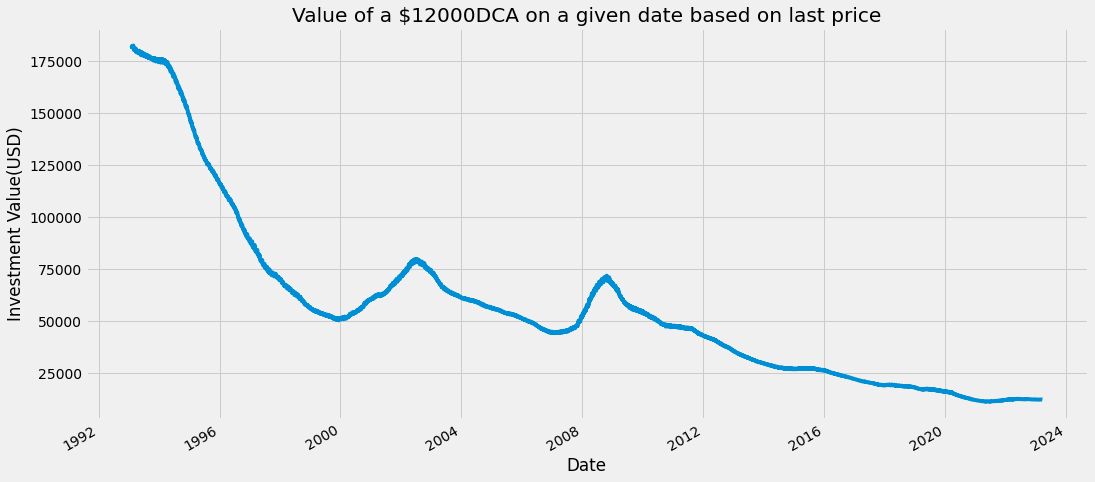

In [96]:
#Plot DCA
dca.plot(figsize = (16,8))
plt.title('Value of a $'+str(initial_investment)+'DCA on a given date based on last price')
plt.xlabel('Date')
plt.ylabel('Investment Value(USD)')

In [97]:
#Get voloatlilty
lump_sum_vol = lump_sum.pct_change().std()
dca_vol = dca.pct_change().std()
print('LS vol:', lump_sum_vol)
print('DCA vol:', dca_vol)

LS vol: 0.011948212077778415
DCA vol: 0.003685271916006582


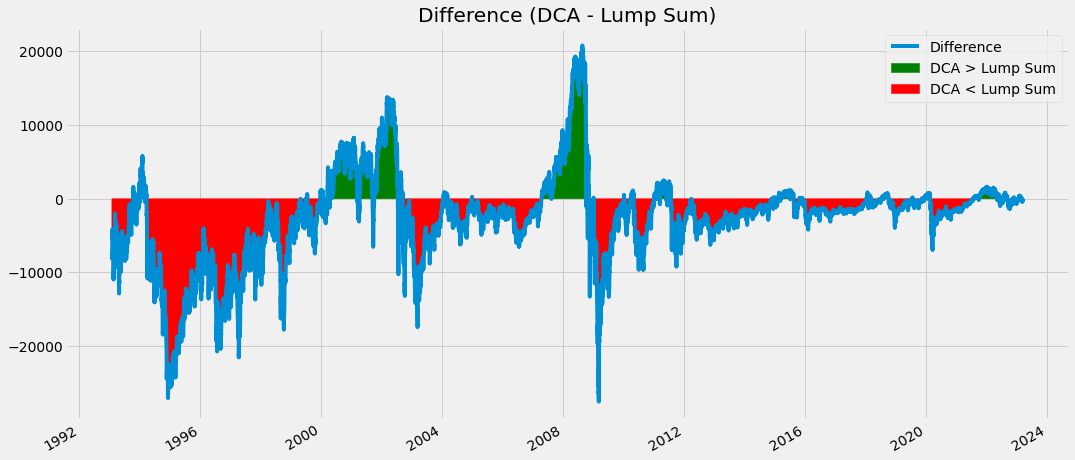

In [98]:
#Get the difference between the 2
difference = dca - lump_sum
#Plot the difference
difference.plot(figsize = (16,8), label = 'Difference')
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'green', where = difference>0, label = 'DCA > Lump Sum')
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'red', where = difference<0, label = 'DCA < Lump Sum')
plt.title('Difference (DCA - Lump Sum)')
plt.legend()

In [99]:
#Calculate the win %
lump_sum_win_percentage = round( sum(difference<0) / len(difference) * 100, 1)
dca_win_percentage = round( sum(difference>0) / len(difference) * 100, 1)
print('LS return more than DCA ' +str(lump_sum_win_percentage)+ '% of the time')
print('DCA return more than LS ' +str(dca_win_percentage)+ '% of the time')

LS return more than DCA 76.5% of the time
DCA return more than LS 23.5% of the time
